# 🧠 Day 3 – SQL via Python: NYC School Data Exploration
In this notebook, you'll connect to a PostgreSQL database and execute SQL queries to explore NYC school data.

# 1. Import Libraries

In this chapter were all necessary library installed and loaded.

In [1]:
!pip install sqlalchemy psycopg2-binary pandas
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
import seaborn as sns

# 2. Connect to the Database

In this section, I set up the connection to the PostgreSQL database using SQLAlchemy and psycopg2.  
The code connects to the remote database with the given credentials and creates an engine for running SQL queries from Python.  

In [2]:
db_user = "neondb_owner"
db_pass = "npg_CeS9fJg2azZD"
db_host = "ep-falling-glitter-a5m0j5gk-pooler.us-east-2.aws.neon.tech"
db_port = "5432"
db_name = "neondb"

# SQLAlchemy Connection String
engine = create_engine(
    f"postgresql+psycopg2://{db_user}:{db_pass}@{db_host}:{db_port}/{db_name}?sslmode=require"
)

# 3. Run a Test Query

To verify that the connection works, I run a simple test query to count the number of high schools in each borough and display the results as a pandas DataFrame.

In [3]:
query = """
SELECT *
FROM nyc_schools.high_school_directory ;
"""
df = pd.read_sql(query, engine)
df.head(10)

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,number_programs,Location 1,Community Board,Council District,Census Tract,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,1,"{'latitude': '40.601989336', 'longitude': '-73...",14,31,100802,20529,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,1,"{'latitude': '40.593593811', 'longitude': '-73...",13,47,306,17616,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,1,"{'latitude': '40.692133704', 'longitude': '-73...",3,36,291,18181,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,1,"{'latitude': '40.822303765', 'longitude': '-73...",9,18,16,11611,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6,"{'latitude': '40.773670507', 'longitude': '-73...",7,6,151,12420,20,4,19,12
5,02M305,"Urban Assembly Academy of Government and Law, The",Manhattan,M445,212-505-0745,212-674-8021,9.0,12,NaN,NaN,...,1,"{'latitude': '40.716867224', 'longitude': '-73...",3,1,18,11723,70,4,32,4
6,11X509,High School of Language and Innovation,Bronx,X415,718-944-3625,718-944-3641,9.0,12,NaN,NaN,...,1,"{'latitude': '40.859698316', 'longitude': '-73...",11,13,324,11607,59,5,12,32
7,17K122,Pathways in Technology Early College High Scho...,Brooklyn,K625,718-221-1593,718-221-1781,9.0,12,9.0,14.0,...,1,"{'latitude': '40.675402307', 'longitude': '-73...",8,36,311,17615,16,2,49,49
8,08X348,Schuylerville Preparatory High School,Bronx,X405,718-904-4200,718-935-4209,9.0,11,9.0,12.0,...,1,"{'latitude': '40.840513977', 'longitude': '-73...",10,13,194,11270,43,5,12,28
9,24Q236,International High School for Health Sciences,Queens,Q455,718-595-8600,718-595-8605,9.0,11,9.0,12.0,...,1,"{'latitude': '40.7412052', 'longitude': '-73.8...",4,25,461,14784,66,3,5,68


# 4. Task Queries Below

In this section, I answer the main task questions using SQL queries and Python.  
Each query is written to analyze a different aspect of the NYC school data, such as school distribution, student demographics, and special education statistics.  
The results are shown as tables and visualizations, with brief explanations for each step.

### [Q1] How many schools are there in each borough? (School distribution)

         borough  school_count
0       Brooklyn           121
1          Bronx           118
2      Manhattan           106
3         Queens            80
4  Staten Island            10


[Text(0.5, 1.0, 'Number of High Schools by Borough')]

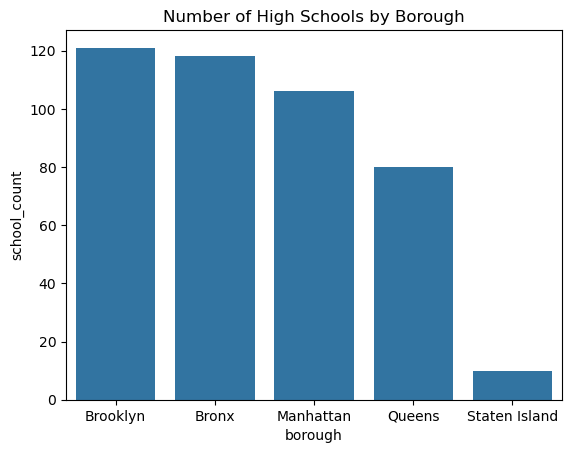

In [4]:
query = """
SELECT borough, COUNT(*) AS school_count
FROM nyc_schools.high_school_directory
GROUP BY borough
Order BY school_count DESC;
"""
borough_schools = pd.read_sql(query, engine)
print(borough_schools)
sns.barplot(data=borough_schools, x='borough', y='school_count').set(title='Number of High Schools by Borough')



#Number of High Schools by Borough
=================================

This query counts the number of high schools in each New York City borough.  
Brooklyn has the most high schools (121), followed by Bronx (118) and Manhattan (106).  
Staten Island has the fewest (21). This helps us understand the distribution of schools across the city.


### [Q2] What is the average % of English Language Learners (ELL) per borough?

In [5]:
query = """
SELECT d.borough, COUNT(*) as total_schools
FROM nyc_schools.school_demographics sd
JOIN nyc_schools.high_school_directory d ON sd.dbn = d.dbn
GROUP BY d.borough
ORDER BY d.borough;
"""
print(pd.read_sql(query, engine))

     borough  total_schools
0  Manhattan             40


         borough  n_directory  n_demographics  n_matching_dbn
0          Bronx          118               0               0
1       Brooklyn          121               0               0
2      Manhattan          106               7              40
3         Queens           80               0               0
4  Staten Island           10               0               0


[Text(0.5, 1.0, 'Number of Matching DBNs by Borough')]

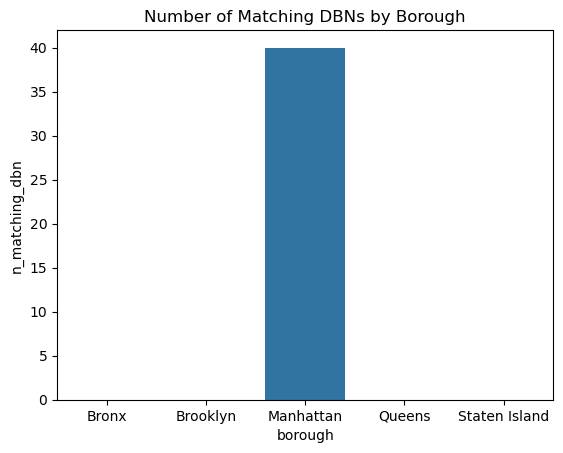

In [6]:
query = """
WITH directory_counts AS (
    SELECT borough, COUNT(DISTINCT dbn) AS n_directory
    FROM nyc_schools.high_school_directory
    GROUP BY borough
),
demographics_counts AS (
    SELECT d.borough, COUNT(DISTINCT s.dbn) AS n_demographics
    FROM nyc_schools.school_demographics s
    JOIN nyc_schools.high_school_directory d ON s.dbn = d.dbn
    GROUP BY d.borough
),
matching_dbns AS (
    SELECT d.borough, COUNT(*) AS n_matching_dbn
    FROM nyc_schools.high_school_directory d
    JOIN nyc_schools.school_demographics s
        ON TRIM(UPPER(d.dbn)) = TRIM(UPPER(s.dbn))
    GROUP BY d.borough
)
SELECT
    dc.borough,
    dc.n_directory,
    COALESCE(demc.n_demographics, 0) AS n_demographics,
    COALESCE(md.n_matching_dbn, 0) AS n_matching_dbn
FROM directory_counts dc
LEFT JOIN demographics_counts demc ON dc.borough = demc.borough
LEFT JOIN matching_dbns md ON dc.borough = md.borough
ORDER BY dc.borough;
"""
avg_ell_by_borough = pd.read_sql(query, engine)
print(avg_ell_by_borough)
sns.barplot(data=avg_ell_by_borough, x='borough', y='n_matching_dbn').set(title='Number of Matching DBNs by Borough')


> **Note:** The available school_demographics data in this database only covers Manhattan.  
> There is no demographic data for Brooklyn, Bronx, Queens, or Staten Island.  
> As a result, all demographic analyses will be limited to Manhattan schools only.


### [Q3] Which are the top 3 schools in each borough with the highest % of special education students? (Join directory + demographics)

In [7]:
query = """
SELECT
    borough,
    school_name,
    sped_percent,
    CASE
        WHEN sped_percent IS NOT NULL THEN rank
        ELSE NULL
    END AS rank
FROM (
    SELECT
        d.borough,
        d.school_name,
        sd.sped_percent,
        ROW_NUMBER() OVER (
            PARTITION BY d.borough
            ORDER BY sd.sped_percent DESC NULLS LAST
        ) as rank
    FROM
        nyc_schools.high_school_directory d
    LEFT JOIN
        nyc_schools.school_demographics sd
        ON d.dbn = sd.dbn
) ranked
WHERE rank <= 3
ORDER BY rank;
"""
top3_sped = pd.read_sql(query, engine)
display(top3_sped)



,borough,school_name,sped_percent,rank
0,Manhattan,East Side Community School,28.8,1.0
1,Manhattan,East Side Community School,27.7,2.0
2,Manhattan,East Side Community School,26.7,3.0
3,Brooklyn,Young Women's Leadership School of Brooklyn,NaN,NaN
4,Brooklyn,Bushwick Leaders High School for Academic Exce...,NaN,NaN
5,Brooklyn,Park Slope Collegiate,NaN,NaN
6,Queens,Newtown High School,NaN,NaN
7,Queens,Richmond Hill High School,NaN,NaN
8,Queens,"Robert F. Wagner, Jr. Secondary School for Art...",NaN,NaN
9,Staten Island,Tottenville High School,NaN,NaN


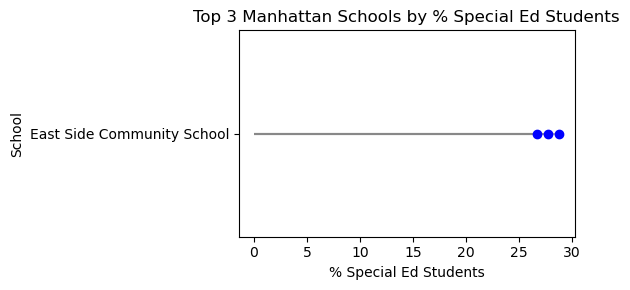

In [8]:
import matplotlib.pyplot as plt

# Filter only non-null sped_percent
plot_data = top3_sped[top3_sped['sped_percent'].notnull()].copy()
plot_data = plot_data.sort_values(['borough', 'sped_percent'], ascending=[True, False])

fig, ax = plt.subplots(figsize=(6, 3))
ax.hlines(y=plot_data['school_name'], xmin=0, xmax=plot_data['sped_percent'], color='gray', alpha=0.6)
ax.plot(plot_data['sped_percent'], plot_data['school_name'], "o", color="blue")

ax.set_xlabel('% Special Ed Students')
ax.set_ylabel('School')
ax.set_title('Top 3 Manhattan Schools by % Special Ed Students')
plt.tight_layout()
plt.show()



#Top 3 schools per borough by percent of special education students
==================================================================

This query selects the top 3 schools in each borough with the highest percentage of special education students (`sped_percent`).  
The results use a left join, so all boroughs are included—even if no special education data is available for some schools.  
For boroughs with missing data, the `sped_percent` and `rank` columns will show as "Missing value" or null.  
Due to data limitations, only Manhattan has demographic data in this sample database. 
The horizontal lollipop chart shows the values of Percentage of special education students.


# 5. Insights

Observations and Findings

**[Q1] How many schools are there in each borough?**

- Brooklyn has the highest number of high schools (121), followed by the Bronx (118), Manhattan (106), Queens (80), and Staten Island (10).
- This distribution shows that most schools are located in Brooklyn and the Bronx, while Staten Island has the fewest.

**[Q2] What is the average % of English Language Learners (ELL) per borough?**

- Due to data limitations, demographic data (including ELL percentages) is only available for Manhattan in this database.
- As a result, the average ELL percentage could only be calculated for Manhattan schools.
- The findings here may not represent the whole city, but demonstrate how to approach the analysis.

**[Q3] Which are the top 3 schools in each borough with the highest % of special education students?**

- Again, only Manhattan has the required demographic data for this calculation.
- The top 3 Manhattan schools with the highest percentage of special education students were identified and visualized.
- For other boroughs, the absence of data is clearly shown in the results table.

**General Notes and Insights:**

- The analysis demonstrates how to connect to a PostgreSQL database, write SQL queries in Python, join tables, and visualize results.
- Data limitations restricted detailed analysis to Manhattan only, but the workflow and queries can be reused if more data becomes available.
- Visualizations (bar chart and lollipop chart) effectively highlighted both distributions and top-ranked schools.
